In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'/Users/sehan/Documents/Data_Collection-26-08/binarytop10.csv')

In [3]:
dataset.head()

,Unnamed: 0,Seq,sTtl,Offset,TcpRtt,AckDat,e,icmp,tcp,INT,RST,Label
0,0,1,58.0,128,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Benign
1,1,2,58.0,232,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Benign
2,2,3,117.0,336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
3,3,4,117.0,440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
4,4,5,117.0,544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign


In [4]:
dataset = dataset.drop(columns=['Attack Type', 'Attack type based on tool'])

KeyError: "['Attack Type' 'Attack type based on tool'] not found in axis"

In [4]:
dataset = dataset.fillna(dataset.median())
print(dataset)

         Unnamed: 0  Seq   sTtl  Offset  TcpRtt  AckDat   e          icmp  \
0                 0    1   58.0     128     0.0     0.0         1.0   1.0   
1                 1    2   58.0     232     0.0     0.0         1.0   1.0   
2                 2    3  117.0     336     0.0     0.0         1.0   0.0   
3                 3    4  117.0     440     0.0     0.0         1.0   0.0   
4                 4    5  117.0     544     0.0     0.0         1.0   0.0   
...             ...  ...    ...     ...     ...     ...         ...   ...   
1215885     1215885    1  252.0  190300     0.0     0.0         0.0   0.0   
1215886     1215886    3  255.0  190392     0.0     0.0         0.0   0.0   
1215887     1215887  764   64.0  190496     0.0     0.0         1.0   0.0   
1215888     1215888    3  255.0  190704     0.0     0.0         0.0   0.0   
1215889     1215889    1  252.0  190808     0.0     0.0         0.0   0.0   

         tcp  INT  RST   Label  
0        0.0  0.0  0.0  Benign  
1        

In [6]:
dataset = dataset.iloc[: , 1:]
display(dataset)

,Seq,sTtl,Offset,TcpRtt,AckDat,e,icmp,tcp,INT,RST,Label
0,1,58.0,128,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Benign
1,2,58.0,232,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Benign
2,3,117.0,336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
3,4,117.0,440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
4,5,117.0,544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,252.0,190300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1215886,3,255.0,190392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1215887,764,64.0,190496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Benign
1215888,3,255.0,190704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
X = dataset.iloc[:,0:9].values
y = dataset.iloc[:,10].values

In [8]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [9]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [11]:
import time
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 2.1232073307037354s


In [12]:
start = time.time()
y_pred = model.predict(X_test)
stop = time.time()
print(f"Prediction time: {stop - start}s")

Prediction time: 0.1244049072265625s


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print(accuracy_score(y_test, y_pred))

[[135698   7599]
 [  5665 215805]]
              precision    recall  f1-score   support

      Benign     0.9599    0.9470    0.9534    143297
   Malicious     0.9660    0.9744    0.9702    221470

    accuracy                         0.9636    364767
   macro avg     0.9630    0.9607    0.9618    364767
weighted avg     0.9636    0.9636    0.9636    364767

0.9636370614666349


In [121]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

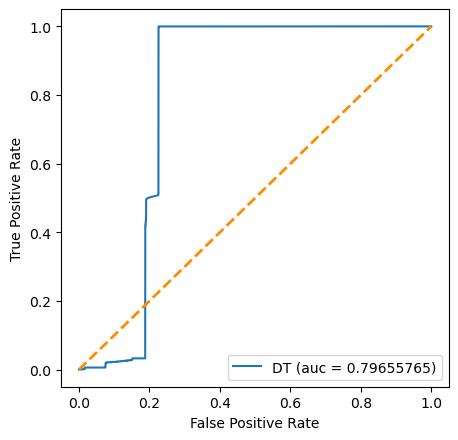

In [157]:
from sklearn.metrics import roc_curve, auc

model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred)
auc_model = auc(model_fpr, model_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(model_fpr, model_tpr, linestyle='-', label='SVM (auc = %0.8f)' % auc_model)
plt.plot([0, 1], [0, 1], color="darkorange", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()